<a href="https://colab.research.google.com/github/arxt9/Assignment_EE7204/blob/main/Assignmnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

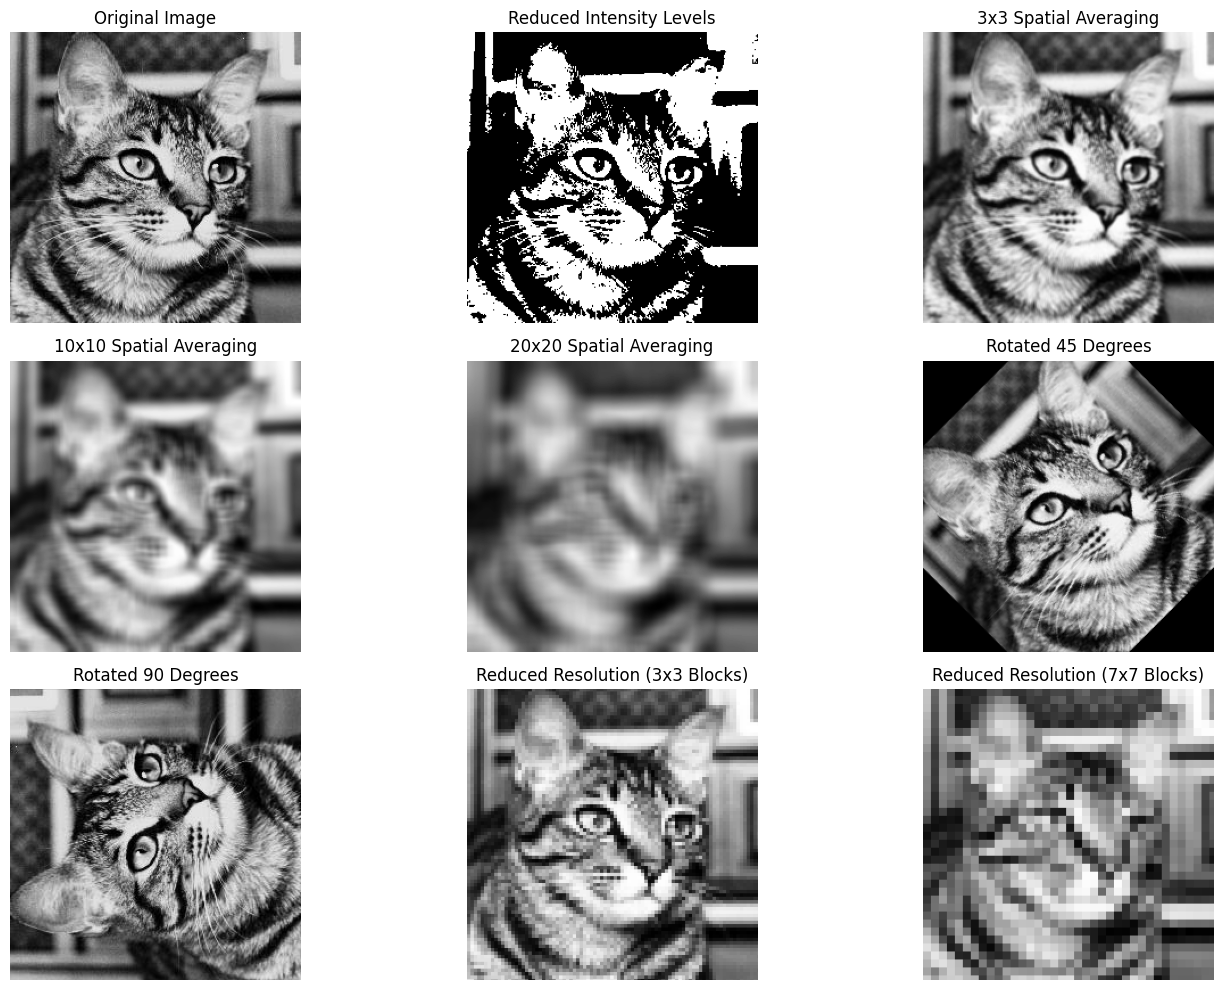

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to reduce the number of intensity levels in an image
def reduce_intensity_levels(image, levels):
    factor = 256 // levels
    reduced_image = (image // factor) * factor
    return reduced_image

# Function to perform spatial averaging
def spatial_averaging(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)
    averaged_image = cv2.filter2D(image, -1, kernel)
    return averaged_image

# Function to rotate an image
def rotate_image(image, angle):
    center = tuple(np.array(image.shape[1::-1]) / 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return rotated_image

# Function to reduce spatial resolution by averaging blocks
def reduce_resolution(image, block_size):
    reduced_image = image.copy()
    for i in range(0, image.shape[0], block_size):
        for j in range(0, image.shape[1], block_size):
            block = image[i:i+block_size, j:j+block_size]
            average_value = np.mean(block)
            reduced_image[i:i+block_size, j:j+block_size] = average_value
    return reduced_image

# Load the image
image = cv2.imread('/content/cateq256-128.jpg', cv2.IMREAD_GRAYSCALE)

# Perform image processing operations
reduced_levels = 2
reduced_image = reduce_intensity_levels(image, reduced_levels)

averaged_3x3 = spatial_averaging(image, 3)
averaged_10x10 = spatial_averaging(image, 10)
averaged_20x20 = spatial_averaging(image, 20)

rotated_45 = rotate_image(image, 45)
rotated_90 = rotate_image(image, 90)

reduced_resolution_3x3 = reduce_resolution(image, 3)
reduced_resolution_5x5 = reduce_resolution(image, 5)
reduced_resolution_7x7 = reduce_resolution(image, 7)

# Plot the images
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(reduced_image, cmap='gray')
plt.title('Reduced Intensity Levels')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(averaged_3x3, cmap='gray')
plt.title('3x3 Spatial Averaging')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(averaged_10x10, cmap='gray')
plt.title('10x10 Spatial Averaging')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(averaged_20x20, cmap='gray')
plt.title('20x20 Spatial Averaging')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(rotated_45, cmap='gray')
plt.title('Rotated 45 Degrees')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(rotated_90, cmap='gray')
plt.title('Rotated 90 Degrees')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(reduced_resolution_3x3, cmap='gray')
plt.title('Reduced Resolution (3x3 Blocks)')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(reduced_resolution_7x7, cmap='gray')
plt.title('Reduced Resolution (7x7 Blocks)')
plt.axis('off')

plt.tight_layout()
plt.show()


